In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator 
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

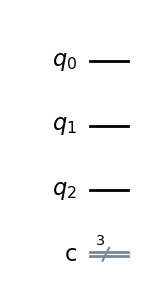

In [2]:
qc = QuantumCircuit(3,3)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


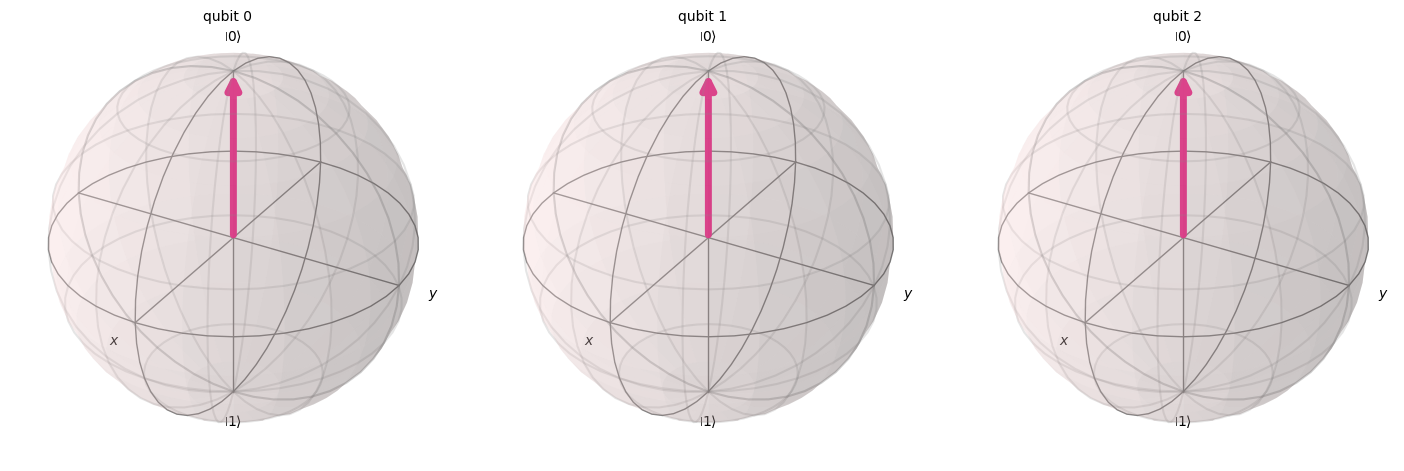

In [3]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)

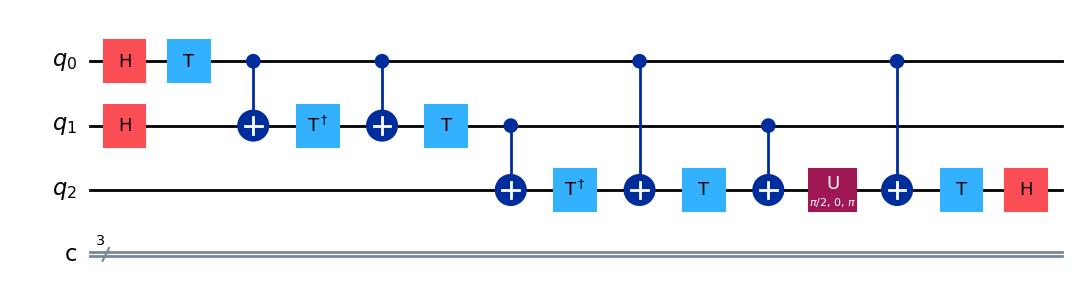

In [4]:
qc.h(0)
qc.h(1)

qc.t(0)

# theta = np.pi
# phi = 0
# lam = np.pi
# qc.u(theta,phi,lam,2)

qc.cx(0,1)
qc.tdg(1)
qc.cx(0,1)
qc.t(1)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)

theta = np.pi/2
phi = 0
lam = np.pi
qc.u(theta,phi,lam,2)

qc.cx(0,2)
qc.t(2)
qc.h(2)

qc.draw(output="mpl")

Statevector([ 0.4267767+0.1767767j, -0.1767767+0.0732233j,
              0.4267767+0.1767767j, -0.1767767+0.0732233j,
              0.0732233-0.1767767j, -0.1767767-0.4267767j,
              0.0732233-0.1767767j, -0.1767767-0.4267767j],
            dims=(2, 2, 2))


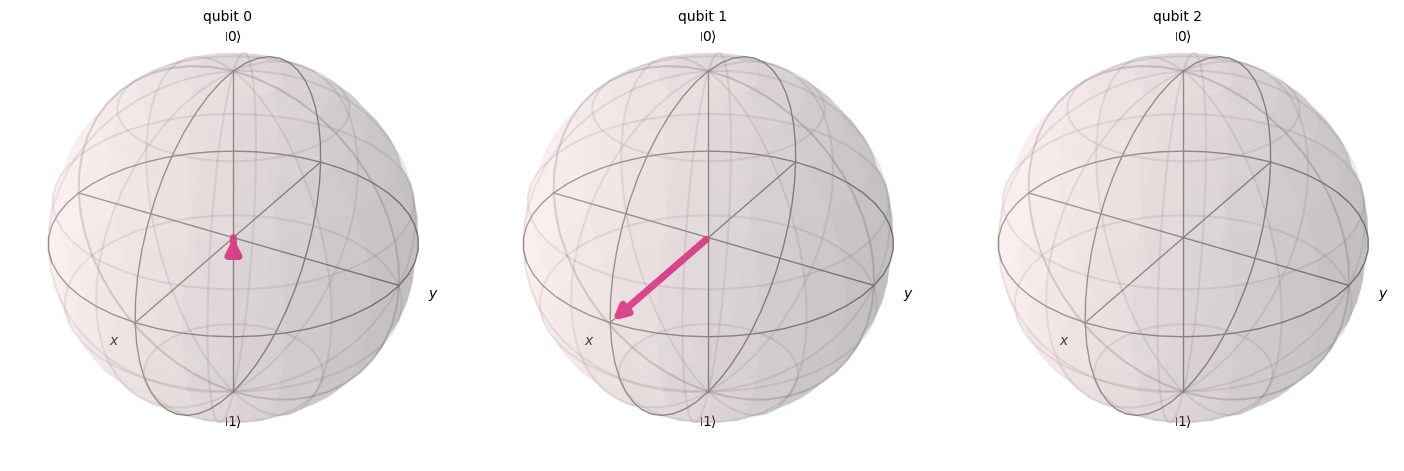

In [5]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)
# plot_state_city(out_vector)

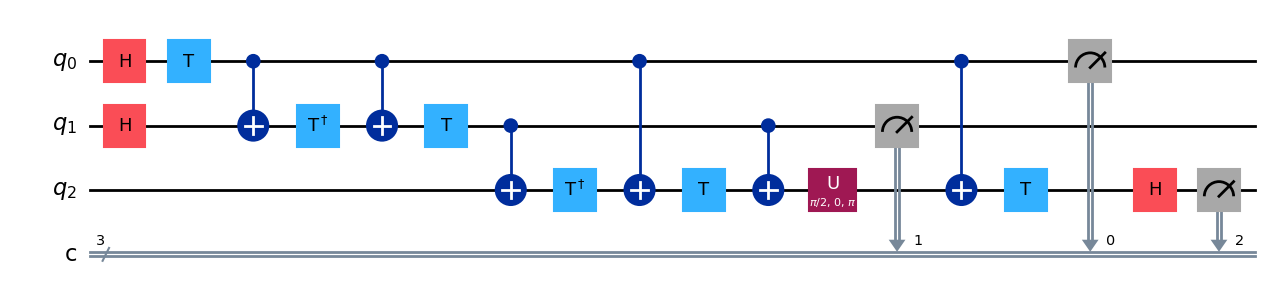

In [6]:
qc.measure([0,1,2],[0,1,2])
qc.draw(output="mpl")

Measurement results: {'011': 37, '111': 207, '100': 42, '001': 33, '110': 30, '000': 209, '010': 218, '101': 224}


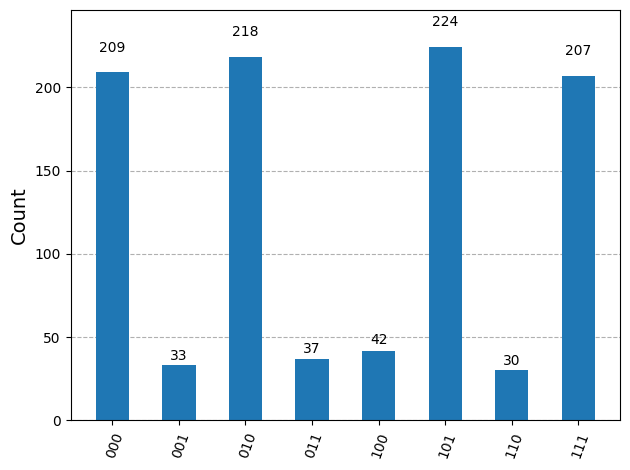

In [7]:
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)
plot_histogram(counts)